In [1]:
from math import sqrt
from scipy import stats

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pydataset import data
import statistics



In [2]:
#Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
#A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
#A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days.
#Use a .05 level of significance.

In [3]:
#this would be a two tail test bc we are testing inequality and not > or <.
#two independent samples we are comparing against each other and not against entire population.
      #hypothesis
#hnull = average sales time of office 1 == average sales time of office 2
#Halt = average sales time of office 1 ! = average sales time of office 2.
#normality: we were told they are normal. there are also enough samples to support CLT.
#Variance:

office_1 = stats.norm(90,15).rvs(40)
office_2 = stats.norm(100,20).rvs(50)

In [4]:
x = np.arange(40,150)
h = stats.norm(90,15).pdf(x)
f = stats.norm(100,20).pdf(x)


In [5]:
stat, p_val = stats.levene(office_1,office_2)
if p_val < .05:
    print('we can reject hnull')
    

we can reject hnull


In [6]:
t_stat,p_val = stats.ttest_ind(office_1,office_2,equal_var = False)


In [7]:
if p_val < .05:
    print('our pval is less than alpha and we can reject null hypothesis which indicates difference in sales time avg')

our pval is less than alpha and we can reject null hypothesis which indicates difference in sales time avg


In [8]:
stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var = False)

Ttest_indResult(statistic=-2.7091418459143854, pvalue=0.00811206270346016)

In [9]:
p_val

0.015069346068017048

In [10]:
#Load the mpg dataset and use it to answer the following questions:


#Are compact cars more fuel-efficient than the average car?
#Do manual cars get better gas mileage than automatic cars?

In [11]:
mpg = data('mpg')

In [12]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [13]:
#        Is there a difference in fuel-efficiency in cars from 2008 vs 1999

In [14]:
#Two tailed test - looking for inequality
#two independent samples
#we will use ttest_ind

In [15]:
#hnull - fuel efficiency in 2008 cars == to 1999 cars
#halt - fuel efficiecny in 2008 cars != to 1999 cars

In [16]:
mpg['avg_fe'] = stats.hmean(mpg[['cty','hwy']],axis = 1) # DOESNT WORK
fe_2008 = mpg[mpg.year == 2008].avg_fe
fe_1999 = mpg[mpg.year == 2008].avg_fe


In [17]:
#LEVENE TEST:
#hnull - equal variance in avg_fe from 2008 and 1999
#halt - there is inequal variance in avg_fe from 2008 and 1999
sta, p_val = stats.levene(fe_1999, fe_2008)
if p_val < .05:
    print('we can reject null. variance is inequal')
    

In [18]:
t_stat,P_val = stats.ttest_ind(fe_1999, fe_2008)
t_stat,P_val

(0.0, 1.0)

In [19]:
#         Are compact cars more fuel-efficient than the average car?

In [20]:
#one tailed test. checking if mileage of compact cars is GREATER than all cars avg mileage
#one sample. We are comparing one sample(compact cars) to entire population
#hnull - compact car avg mileabe <= all vehicle avg mileage
#halt - compact car avg mileage > all vehicle avg mileage
# since one tail we use p/2 compared to alpha not just p.
#tstat should be positive

In [21]:
fe_compacts = mpg[mpg['class'] == 'compact'].avg_fe
fe_overall = mpg.avg_fe.mean()

In [22]:
t_stat, p_val = stats.ttest_1samp(fe_compacts, fe_overall)


In [23]:
if t_stat > 0 and ((p_val/2) > .05):
    print('we can reject the null')

In [24]:
#       Do manual cars get better gas mileage than automatic cars?

In [25]:
#one tailed test. Checking if manual cars have BETTER mileage than automatic cars
#two sample test bc comparing MANUAL vs AUTOMATIC. two seperate samples.
#hnull -manual car avg mileage <= automatic car avg mileage
#halt -manual car avg mileage > automatic car avg mileage
#one sample test.



In [26]:
auto_fe = mpg[mpg.trans.str.contains('auto')].avg_fe
manual_fe = mpg[mpg.trans.str.contains('manual')].avg_fe

In [27]:
#LEVENE TEST:
#hnull -equiv var

#halt - nonequiv var
stats.levene(manual_fe,auto_fe)
#cant reject null, var is equal
t , p = stats.ttest_ind(manual_fe, auto_fe)
if t>0 and ((p/2)< .05):
    print('we can reject our null')
else:
    print('we cant reject null')

we can reject our null


In [28]:
#------------------------------------CORRELATION EXERCISES----------------------------------------------------------
df =  pd.read_csv('telco_churn.csv')
a = .05

In [29]:
#Use the telco_churn data. 
#Does tenure correlate with monthly charges? 



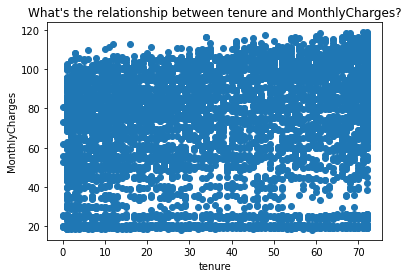

In [30]:
plt.scatter(df.tenure,df.MonthlyCharges)
plt.title("What's the relationship between tenure and MonthlyCharges?")
plt.xlabel('tenure')
plt.ylabel('MonthlyCharges')
plt.show()


In [31]:
x = df.tenure
y = df.MonthlyCharges
r,p = stats.pearsonr(x,y)
print('r =', r)
print('p =', p)

r = 0.24789985628615002
p = 4.0940449915016345e-99


In [32]:
if p < a:
    print("there is a linear relationship")
else:
    print("there is no linear relationship")

there is a linear relationship


In [33]:
#Does tenure correalate with TotalCharges?

In [34]:
df.TotalCharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [35]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')

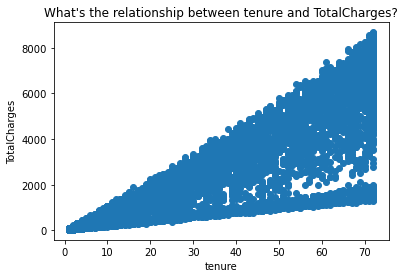

In [36]:
plt.scatter(df.tenure,df.TotalCharges)
plt.title("What's the relationship between tenure and TotalCharges?")
plt.xlabel('tenure')
plt.ylabel('TotalCharges')
plt.show()



In [37]:
x = df.tenure
y = df.TotalCharges
r,p = stats.pearsonr(x,y.interpolate(method = 'linear'))
print('r =', r)
print('p =', p)

r = 0.824238893025497
p = 0.0


In [38]:
#              Tenure does correlate with TotalCharges

In [39]:
#What happens if you control for phone and internet services?

In [40]:
w_phone = df.PhoneService == 'Yes'
wo_phone = df['PhoneService'] == 'No'
w_fiber= df['InternetService'] == 'Fiber optic'
w_dsl = df['InternetService'] == 'DSL'
wo_int = df['InternetService'] == 'No'


In [41]:
#fiber optic
#DSL
#No



In [42]:
# WITH PHONE AND FIBER
x = df[(w_phone) & (w_fiber)].tenure
y = df[(w_phone) & (w_fiber)].TotalCharges
r,p = stats.pearsonr(x,y.interpolate(method = 'linear'))
print('r =', r)
print('p =', p)

r = 0.9853093528070603
p = 0.0


In [43]:
# WITH PHONE AND DSL
x = df[(w_phone) & (w_dsl)].tenure
y = df[(w_phone) & (w_dsl)].TotalCharges
r,p = stats.pearsonr(x,y.interpolate(method = 'linear'))
print('r =', r)
print('p =', p)


r = 0.969871031625277
p = 0.0


In [44]:
# WITH PHONE AND NO INT
x = df[(w_phone) & (wo_int)].tenure
y = df[(w_phone) & (wo_int)].TotalCharges
r,p = stats.pearsonr(x,y.interpolate(method = 'linear'))
print('r =', r)
print('p =', p)



r = 0.9780858741893088
p = 0.0


In [45]:
#NO PHONE AND FIBER
#x = df[(wo_phone) & (w_fiber)].tenure
#y = df[(wo_phone) & (w_fiber)].TotalCharges
#r,p = stats.pearsonr(x,y.interpolate(method = 'linear'))
#print('r =', r)
#print('p =', p)

In [46]:
df[(wo_phone) & (w_fiber)]
pd.crosstab(wo_phone,w_fiber)
#there is no intersection of no phone with fiber

InternetService,False,True
PhoneService,,
False,3265,3096
True,682,0


In [47]:
#no PHONE AND DSL|

In [48]:
x = df[(wo_phone) & (w_dsl)].tenure
y = df[(wo_phone) & (w_dsl)].TotalCharges
r,p = stats.pearsonr(x,y.interpolate(method = 'linear'))
print('r =', r)
print('p =', p)

r = 0.9512627356708929
p = 0.0


In [49]:
#x = df[(wo_phone) & (wo_int)].tenure
#y = df[(wo_phone) & (wo_int)].TotalCharges
#r,p = stats.pearsonr(x,y.interpolate(method = 'linear'))
#print('r =', r)
#print('p =', p)

In [50]:
#NO intersection of no phone no internet
#df[(wo_phone) & (wo_int)]
pd.crosstab(df.PhoneService,df.InternetService)

InternetService,DSL,Fiber optic,No
PhoneService,,,
No,682,0,0
Yes,1739,3096,1526


In [51]:
import pandas as pd
import env

url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/employees'



In [52]:
#Is there a relationship between how long an employee has been with the company and their salary
query = '''
select *
from employees
    join salaries
        using(emp_no)
where to_date = '9999-01-01'

'''

In [53]:
df = pd.read_sql(query,url)

In [54]:
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01


In [55]:
df.to_date.value_counts()

9999-01-01    240124
Name: to_date, dtype: int64

In [56]:
df.hire_date.value_counts()

1985-06-06    114
1985-12-12    110
1985-05-11    109
1985-06-20    109
1985-03-21    106
             ... 
1999-12-18      1
2000-01-04      1
1999-07-03      1
1999-09-26      1
2000-01-22      1
Name: hire_date, Length: 5425, dtype: int64

In [57]:
(df.to_date - df.hire_date)

0         2926512 days, 0:00:00
1         2926729 days, 0:00:00
2         2926449 days, 0:00:00
3         2926354 days, 0:00:00
4         2925338 days, 0:00:00
                  ...          
240119    2924120 days, 0:00:00
240120    2924958 days, 0:00:00
240121    2926578 days, 0:00:00
240122    2923846 days, 0:00:00
240123    2922337 days, 0:00:00
Length: 240124, dtype: object

In [58]:
query = '''
select emp_no
, datediff(max(to_date))
'''

In [59]:
#---------------------------chi square exercises------------------------------------------------------------------

In [60]:
codeup_students = 50/100
not_student = 50/100
uses_mac = 69/100
no_mac = 31/100



In [61]:
mac_and_student = codeup_students * uses_mac
mac_and_nstudent = not_student * uses_mac
nmac_and_student = codeup_students * no_mac
nmac_and_nstudent = not_student * no_mac

In [62]:
observed = pd.data]

In [63]:
expected = [mac_and_student, mac_and_nstudent, nmac_and_student, nmac_and_nstudent]

In [74]:
alpha = .05

In [ ]:
#we commin back to this

In [65]:
mpg.nunique()

manufacturer    15
model           38
displ           35
year             2
cyl              4
trans           10
drv              3
cty             21
hwy             27
fl               5
class            7
avg_fe          78
dtype: int64

In [66]:
mpg.drv.value_counts()

f    106
4    103
r     25
Name: drv, dtype: int64

In [67]:
#hnull = drive type is independent of manufacturer
#halt = drive type is dependent on manufacturer


In [68]:
pd.crosstab(mpg.drv,mpg.manufacturer, margins = True)

manufacturer,audi,chevrolet,dodge,ford,honda,hyundai,jeep,land rover,lincoln,mercury,nissan,pontiac,subaru,toyota,volkswagen,All
drv,,,,,,,,,,,,,,,,
4,11,4,26,13,0,0,8,4,0,4,4,0,14,15,0,103
f,7,5,11,0,9,14,0,0,0,0,9,5,0,19,27,106
r,0,10,0,12,0,0,0,0,3,0,0,0,0,0,0,25
All,18,19,37,25,9,14,8,4,3,4,13,5,14,34,27,234


In [69]:
observed = pd.crosstab(mpg.drv,mpg.manufacturer)

In [70]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [71]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[11  4 26 13  0  0  8  4  0  4  4  0 14 15  0]
 [ 7  5 11  0  9 14  0  0  0  0  9  5  0 19 27]
 [ 0 10  0 12  0  0  0  0  3  0  0  0  0  0  0]]

Expected
[[ 7  8 16 11  3  6  3  1  1  1  5  2  6 14 11]
 [ 8  8 16 11  4  6  3  1  1  1  5  2  6 15 12]
 [ 1  2  3  2  0  1  0  0  0  0  1  0  1  3  2]]

----
chi^2 = 232.0345
p     = 0.0000


In [72]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


In [73]:
#This means there is a relationship between manufacturer and drive type
#hnull = an employees gender is independent of whether they work in sales or marketing 
#halt = an employees gender is dependent on whether they work in sales or marketing

In [77]:
query = '''
SELECT * FROM dept_emp
join employees using(emp_no)
join departments using(dept_no);
'''

In [83]:
newdf = df[(df.dept_name == 'Sales') | (df.dept_name == 'Marketing')]

In [86]:
df = pd.read_sql(query,url)

In [90]:
df.gender


0         F
1         M
2         F
3         M
4         F
         ..
331598    M
331599    M
331600    F
331601    F
331602    F
Name: gender, Length: 331603, dtype: object

In [92]:
observed = pd.crosstab(df.gender,newdf.dept_name)

In [96]:
observed

dept_name,Marketing,Sales
gender,,
F,8037,20854
M,12174,31391


In [93]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [94]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 8037 20854]
 [12174 31391]]

Expected
[[ 8058 20832]
 [12152 31412]]

----
chi^2 = 0.1311
p     = 0.7173


In [95]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

we fail to reject the null


In [97]:
#gender is independent of whether someone works in sales or marketing

In [ ]:
#hnull= someone becoming a manager is not dependent on gender
#halt = someone becoming a manager is dependent on gender

In [109]:
query = '''
SELECT employees.emp_no, employees.gender, dept_manager.dept_no FROM employees
left join dept_manager on dept_manager.emp_no = employees.emp_no;
'''

In [110]:
df = pd.read_sql(query,url)

In [131]:
yo = df.dept_no.isnull()

In [155]:
df.manager.value_counts()

True     300000
False        24
Name: manager, dtype: int64

In [148]:
df['manager'] = yo

In [147]:
df[df.manager == False]

,emp_no,gender,dept_no,manager
100000,110022,M,d001,False
100001,110039,M,d001,False
100002,110085,M,d002,False
100003,110114,F,d002,False
100004,110183,F,d003,False
100005,110228,F,d003,False
100006,110303,F,d004,False
100007,110344,F,d004,False
100008,110386,M,d004,False
100009,110420,M,d004,False


In [156]:
observed = pd.crosstab(df.gender,df.manager)

In [157]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [158]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[    13 120038]
 [    11 179962]]

Expected
[[     9 120041]
 [    14 179958]]

----
chi^2 = 1.4567
p     = 0.2275


In [153]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

we fail to reject the null


In [ ]:
#someone become a manager is independent of their gender